In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [9]:
# Load the dataset
housing_data = pd.read_csv(r'C:\Users\PREMIUM\Downloads\housing_dataset.csv')

# Check for missing values
missing_values = housing_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Encode categorical features
label_encoder_brick = LabelEncoder()
label_encoder_neighborhood = LabelEncoder()

housing_data['Brick'] = label_encoder_brick.fit_transform(housing_data['Brick'])
housing_data['Neighborhood'] = label_encoder_neighborhood.fit_transform(housing_data['Neighborhood'])

# Display the unique values of encoded features
encoded_features = {
    'Brick': list(label_encoder_brick.classes_),
    'Neighborhood': list(label_encoder_neighborhood.classes_)
}
print("Encoded Features:\n", encoded_features)

Missing Values:
 Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64
Encoded Features:
 {'Brick': ['No', 'Yes'], 'Neighborhood': ['East', 'North', 'West']}


Descriptive Statistics:
              Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000   
max    128.000000  211200.000000  2590.000000    5.000000    4.000000   

           Offers       Brick  Neighborhood  
count  128.000000  128.000000    128.000000  
mean     2.578125    0.328125      0.953125  
std      1.069324    0.471376      0.811913  
min      1.000000    0.000000      0.000000  
25%      2.000000    0.000000      0.000000  
50%      3.000000    0.000000      1.0000

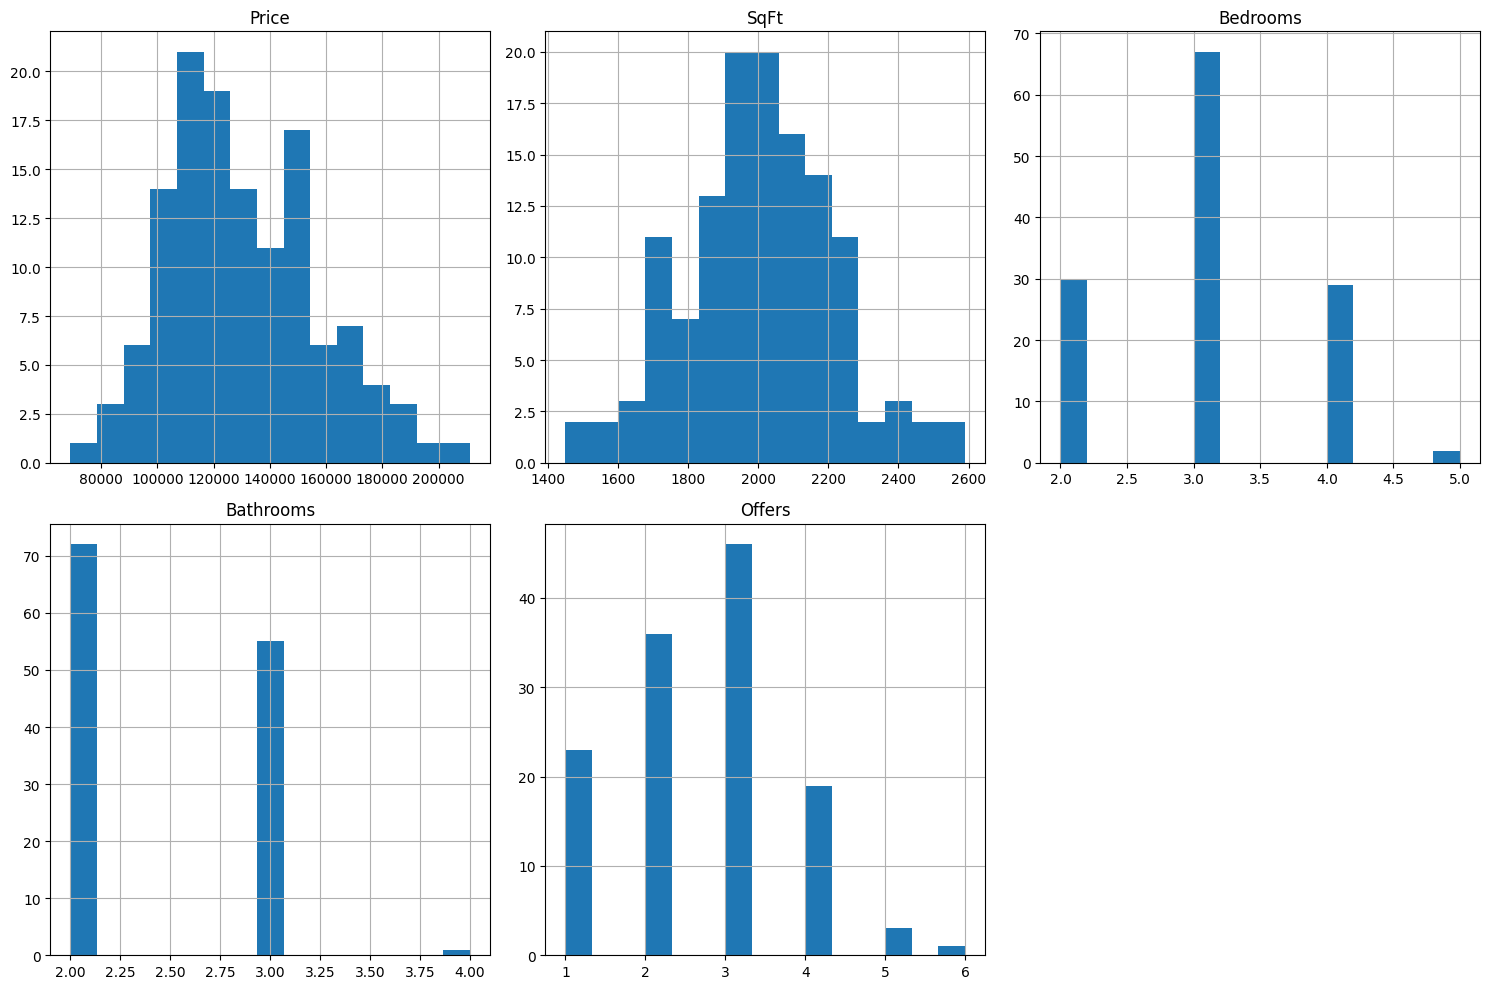

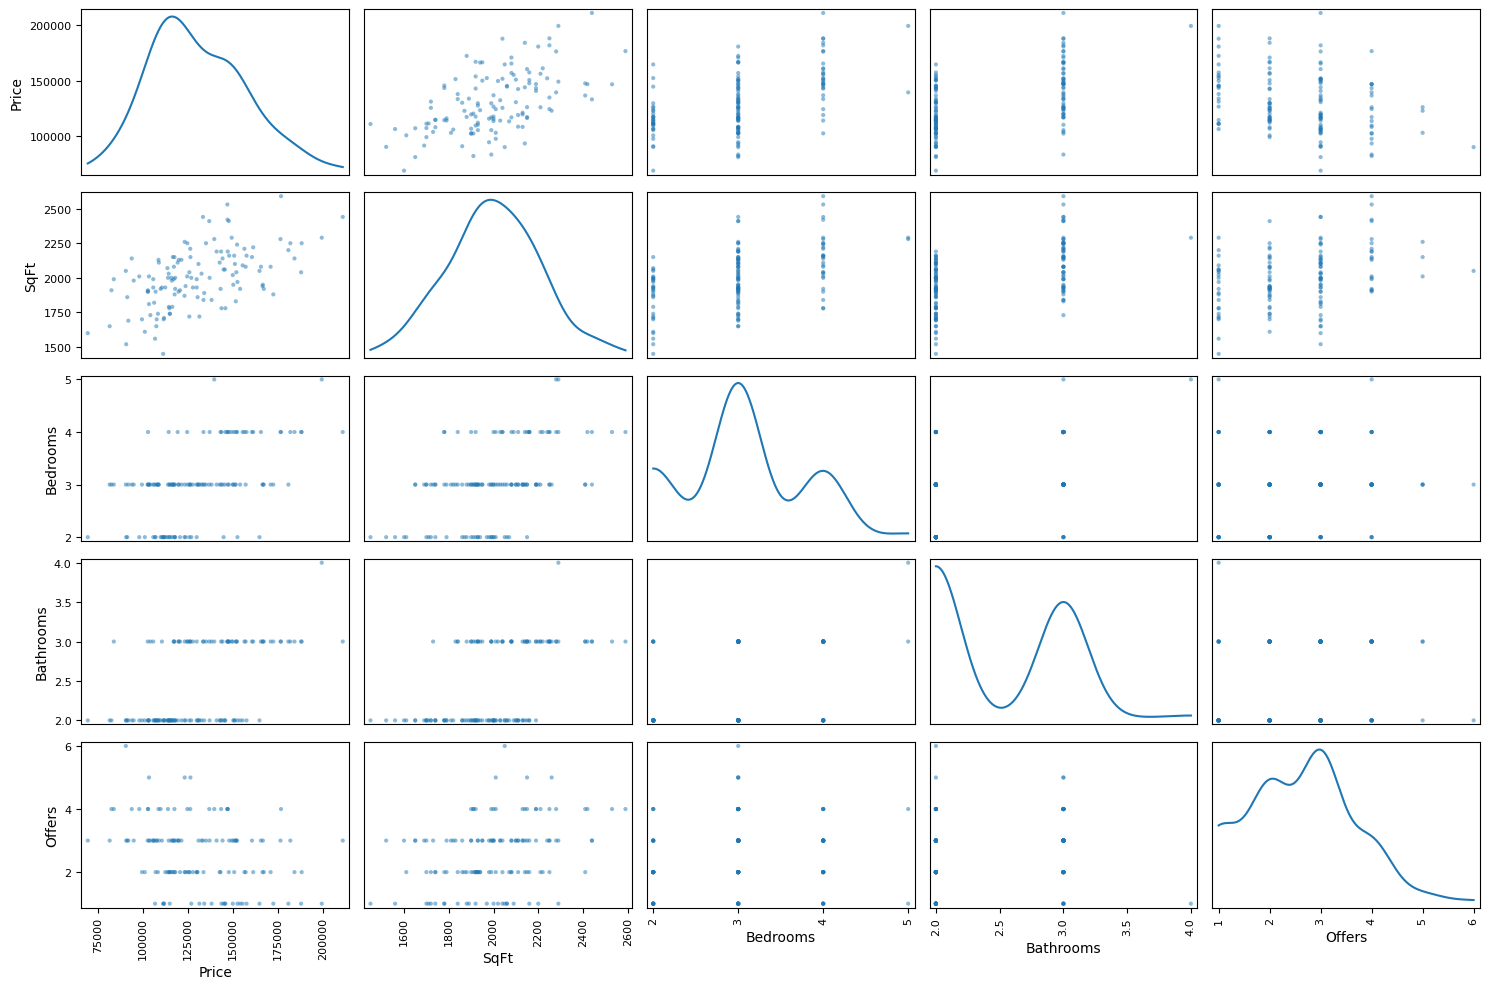

In [10]:
# Descriptive statistics
descriptive_stats = housing_data.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Histograms for numerical features
numerical_features = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

# Plot histograms
housing_data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()

# Scatter plot matrix
pd.plotting.scatter_matrix(housing_data[numerical_features], figsize=(15, 10), diagonal='kde')
plt.tight_layout()
plt.show()

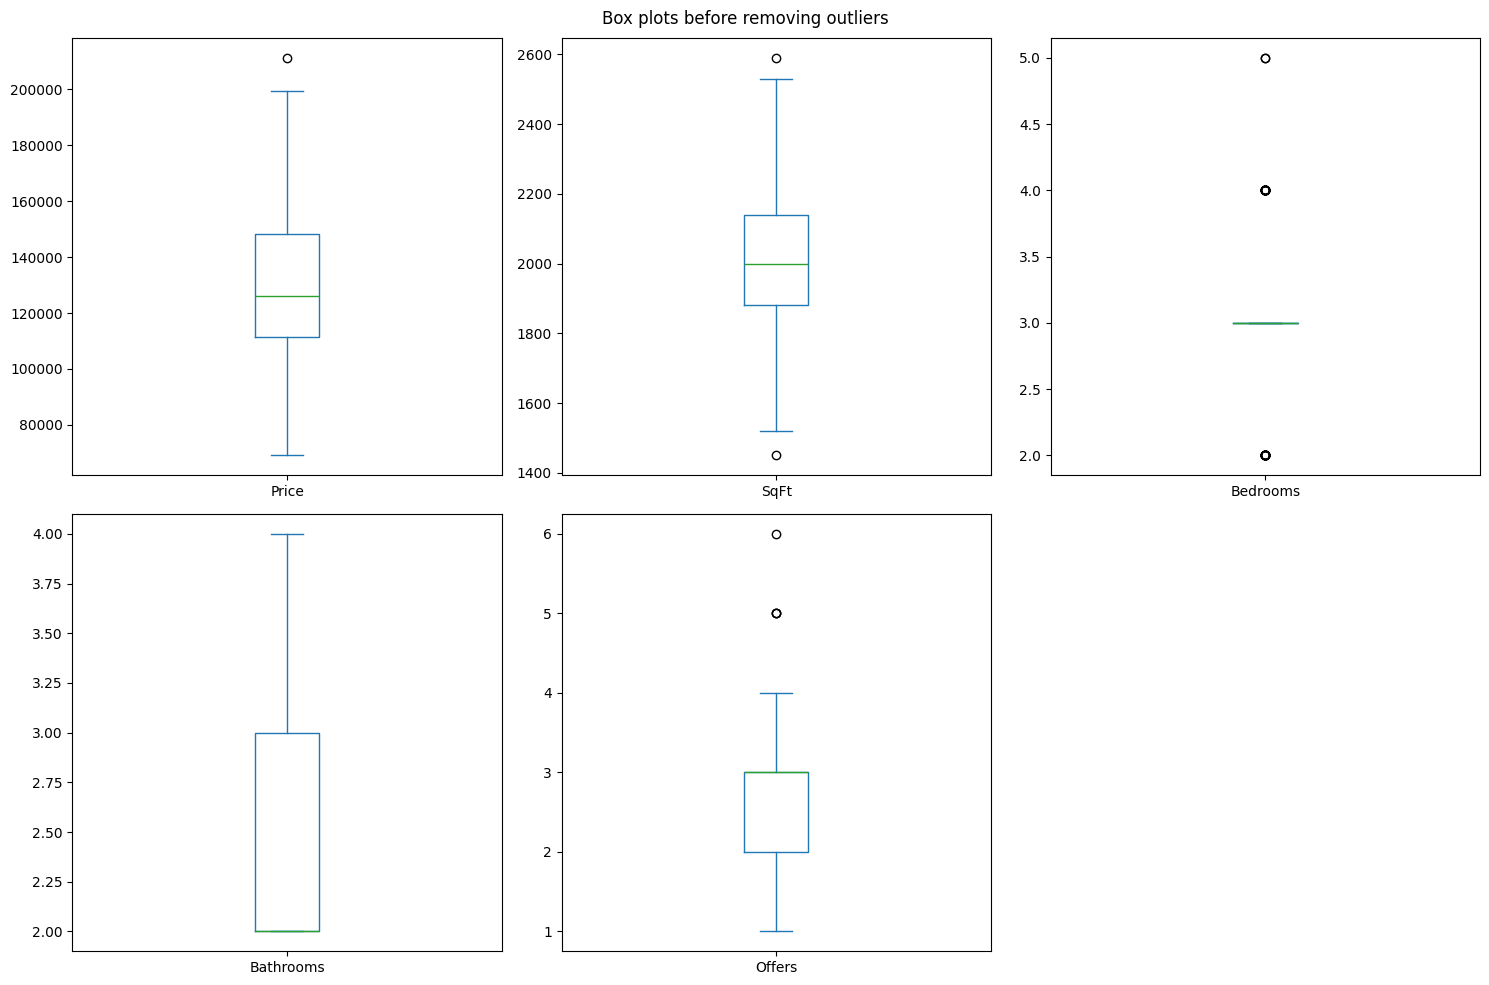

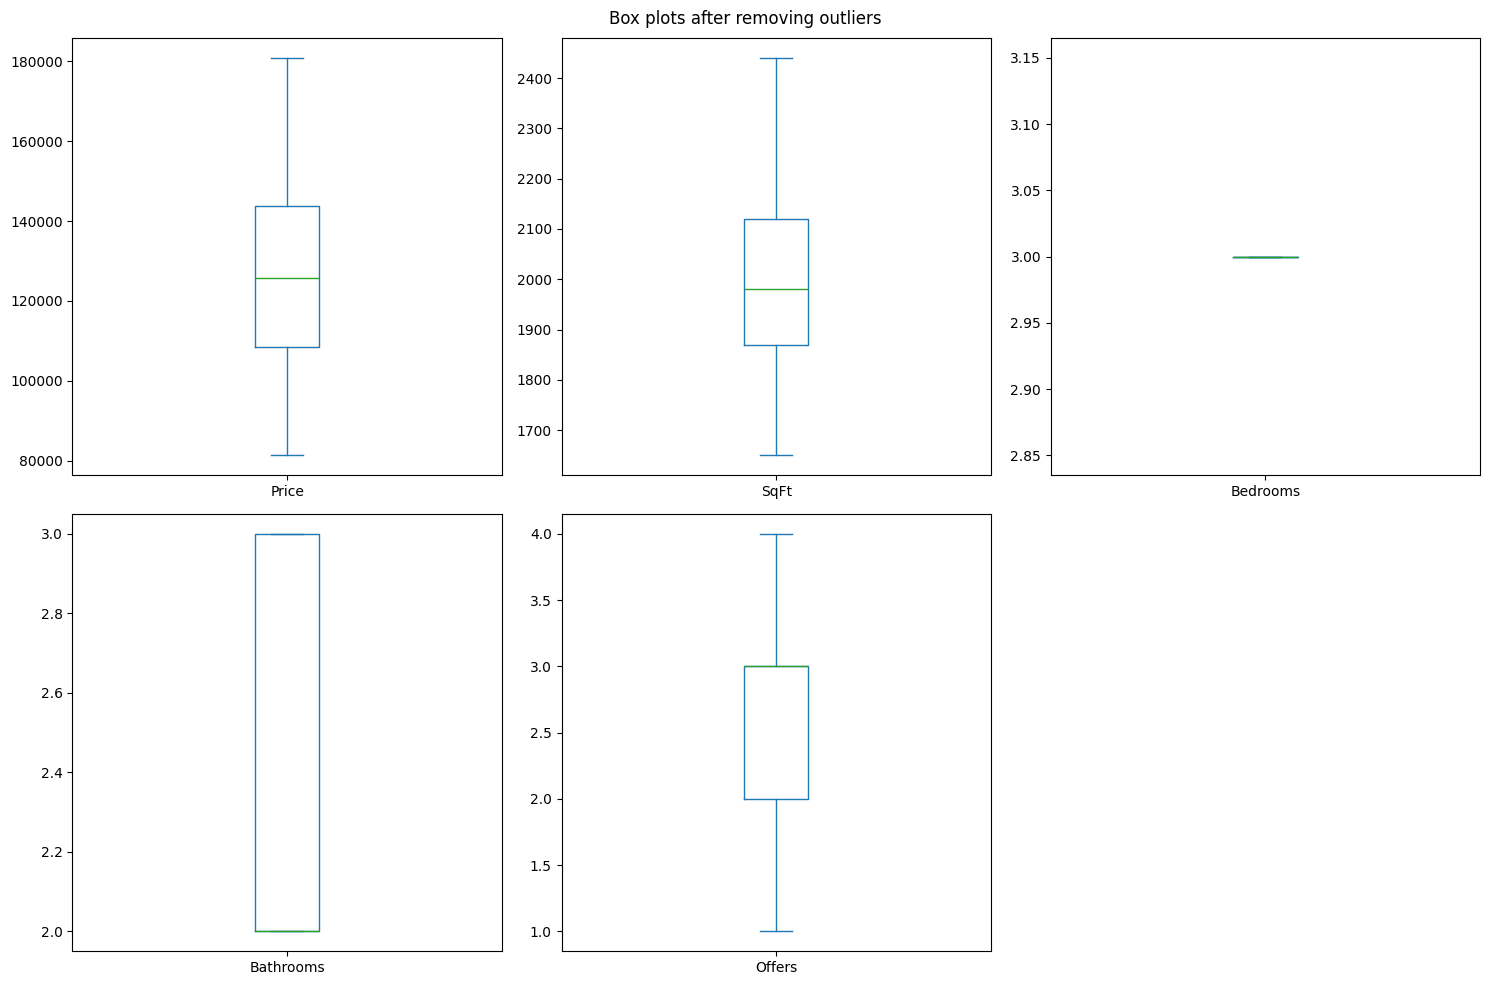

In [11]:
# Function to detect and remove outliers based on the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columns to check for outliers
columns_to_check = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

# Box plots before removing outliers
housing_data[columns_to_check].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), title='Box plots before removing outliers')
plt.tight_layout()
plt.show()

# Remove outliers
housing_data_clean = remove_outliers(housing_data, columns_to_check)

# Box plots after removing outliers
housing_data_clean[columns_to_check].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), title='Box plots after removing outliers')
plt.tight_layout()
plt.show()

In [12]:
# Define features and target variable
X = housing_data_clean.drop(['Price'], axis=1)
y = housing_data_clean['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 10302.902348044989
Mean Squared Error (MSE): 172626847.65430737
R-squared (R2): 0.46368205190353484
